In [1]:
import numpy as np
from IPython.display import HTML

# Introduction to Principal Component Analysis

## Introduction


### Dimensionality Reduction

* A data point could contain many dimensions

    * E.g MNIST image has 784 pixels, hence 784 dimensions (each feature point is a dimension)

* The idea of the dimensionality reduction is to find a low-dimensional space (latent/intrinsic space) that represents the semantic meaning of the datapoints

* Once the semantic meaning of the given data is known, the latent space can be used for:
    
    * Anomaly detection

    * Data generation

    * Data compression (lossy)

    * Feature analysis

* Techniques for dimensionality reduction:

    * Principal Component Analysis (PCA)

    * t-SNE

    * Autoencoders
    
### PCA
 
* PCA allows finding patterns in data without using any supervision signal

    * PCA reduces the dimensionality of the data through linear projection (n-dims to m-dims using a projection matrix W)
    
    * The resulting subspace of data should explains the data well enough for analysis
        
    * The components/dimensions in the subspace represents the variance in the data in a given direction 

### Related Terminologies

* Some terminologies from statistics to understand the PCA

    * Variance: Expected amount of squared difference from the data mean
    
        * $Var(X) = \mathbb E [(X - \mu)^2]$
        
    * Covariance: Measure of the direction of the relationship between two random variables

        * $Cov(X,Y) = \mathbb E [(X-\mu_X)(Y-\mu_Y)]$  
        
    * Correlation: Measurement of the strength of relationship between two random variables and its direction       
    
        * $Corr(X,Y) = \dfrac{Cov(X,Y)}{\sigma_X \sigma_Y}$
        
    * Covariance Matrix: The matrix that represents the Cov between two random variables
    
        * $\Sigma = \begin{bmatrix} Cov(X,X) & Cov(X,Y)  \\Cov(Y,X) & Cov(Y,Y) \\ \end{bmatrix}$
        
        * Diagonal is the self covariance or simply the variance
        
        * The Covariance matrix is symmetrical
        
    * Multivariate Normal Distribution: A generalization of a one dimensional normal distribution to multi-dimensional joint distribution

#### A multivariate distribution with 2 dimensions

<img src="https://upload.wikimedia.org/wikipedia/commons/8/8e/MultivariateNormal.png" height=300 width=300/>

## Reference:

* Eigen values and vectors: 
    * https://wiki.pathmind.com/eigenvector
    * https://setosa.io/ev/eigenvectors-and-eigenvalues/

* On correlation and Covariance:
    * https://corporatefinanceinstitute.com/resources/knowledge/finance/correlation/
    * Coveriance matrix: https://datascienceplus.com/understanding-the-covariance-matrix/
    
* PCA with dummy data: 
    * https://cmdlinetips.com/2018/03/pca-example-in-python-with-scikit-learn/

* tutorial on PCA: 
    * http://www.cs.otago.ac.nz/cosc453/student_tutorials/principal_components.pdf

* PCA MNIST: 
    * https://gist.github.com/mrgloom/6622175
    
* PCA visually explained:
    * https://builtin.com/data-science/step-step-explanation-principal-component-analysis

# PCA Example

In [2]:
###### Code from: https://sebastianraschka.com/Articles/2014_pca_step_by_step.html ###############################

## create a dataset for PCA
np.random.seed(1234)

mu_vec1 = np.array([0,0,0])
cov_mat1 = np.eye(3,3)
## sample 20 values from a 3D multivariate distribution for class 1
class1_sample = np.random.multivariate_normal(mu_vec1, cov_mat1, 20).T
assert class1_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

## sample 20 values from a 3D multivariate distribution for class 2
mu_vec2 = np.array([1,1,1])
cov_mat2 = np.eye(3,3)
class2_sample = np.random.multivariate_normal(mu_vec2, cov_mat2, 20).T
assert class2_sample.shape == (3,20), "The matrix has not the dimensions 3x20"

Populating the interactive namespace from numpy and matplotlib


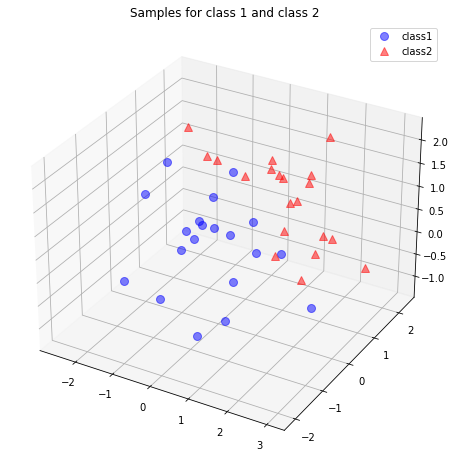

In [3]:
## Plot the 2 classes in a 3D scatter plot
%pylab inline
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
plt.rcParams['legend.fontsize'] = 10   
ax.plot(class1_sample[0,:], class1_sample[1,:], class1_sample[2,:], 'o', markersize=8, color='blue', alpha=0.5, label='class1')
ax.plot(class2_sample[0,:], class2_sample[1,:], class2_sample[2,:], '^', markersize=8, alpha=0.5, color='red', label='class2')

plt.title('Samples for class 1 and class 2')
ax.legend(loc='upper right')

plt.show()

In [4]:
all_samples = np.concatenate((class1_sample, class2_sample), axis=1)
assert all_samples.shape == (3,40), "The matrix has not the dimensions 3x40"

In [5]:
mean_vector = np.array([[np.mean(all_samples[i, :])] for i in range(len(all_samples))])
print('Mean Vector:\n', mean_vector)

Mean Vector:
 [[0.53513993]
 [0.3204501 ]
 [0.74643724]]


## $S = (X-\mu)(X - \mu)T$

In [6]:
## calculate the scatter matrix 
scatter_matrix = np.zeros((3,3))
for i in range(all_samples.shape[1]):
    scatter_matrix += (all_samples[:,i].reshape(3,1) - mean_vector).dot((all_samples[:,i].reshape(3,1) - mean_vector).T)
print('Scatter Matrix:\n', scatter_matrix)

Scatter Matrix:
 [[69.32153776 -0.44803277 -2.35946406]
 [-0.44803277 42.94895756  6.02095291]
 [-2.35946406  6.02095291 25.85365764]]


## $\Sigma = \dfrac{S}{N-1}$ for sample (not population)

In [7]:
## Covariance matrix (covariance between the 3 features)
C = np.cov([all_samples[i,:] for i in range(len(all_samples))])
print("Covariance Matrix:\n {}".format(C))

Covariance Matrix:
 [[ 1.77747533 -0.01148802 -0.06049908]
 [-0.01148802  1.10125532  0.15438341]
 [-0.06049908  0.15438341  0.6629143 ]]


In [8]:
# eigenvectors and eigenvalues for the from the scatter matrix
eig_val_sc, eig_vec_sc = np.linalg.eig(scatter_matrix)

# eigenvectors and eigenvalues for the from the covariance matrix
eig_val_cov, eig_vec_cov = np.linalg.eig(C)
print(eig_val_cov.shape, eig_vec_cov)

(3,) [[ 0.99785694 -0.04649955 -0.04603605]
 [-0.03005032  0.2993114  -0.95368216]
 [-0.0581249  -0.95302176 -0.29727263]]


## Now find top-k eigen values (since eigen vectors only show the direction)



In [9]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_val_sc[i]), eig_vec_sc[:,i]) for i in range(len(eig_val_sc))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
eig_pairs.sort(key=lambda x: x[0], reverse=True)

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
for i in eig_pairs:
    print(i[0])

69.47246835455627
44.804123724679684
23.847560879317122


## Make the $W$ matrix that projects the $d-dim (3)$ inputs to the $k-dim (2)$ subspace

In [10]:
matrix_w = np.hstack((eig_pairs[0][1].reshape(3,1), eig_pairs[1][1].reshape(3,1)))
print('Matrix W:\n', matrix_w)

Matrix W:
 [[ 0.99785694 -0.04603605]
 [-0.03005032 -0.95368216]
 [-0.0581249  -0.29727263]]


## Transform the data into the new subspace

In [11]:
transformed = matrix_w.T.dot(all_samples)
assert transformed.shape == (2,40), "The matrix is not 2x40 dimensional."

## Split the two classes and visualize

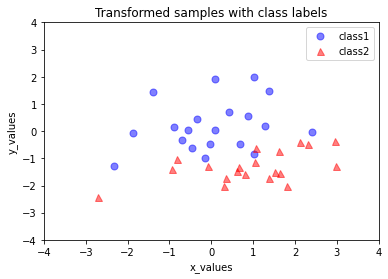

In [12]:
plt.plot(transformed[0,0:20], transformed[1,0:20], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(transformed[0,20:40], transformed[1,20:40], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.legend()
plt.title('Transformed samples with class labels')

plt.show()

## Compare with sklearn PCA class

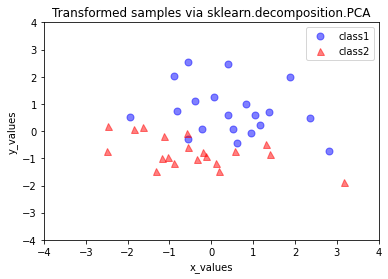

In [13]:
#!pip install sklearn
from sklearn.decomposition import PCA as sklearnPCA

sklearn_pca = sklearnPCA(n_components=2)
sklearn_transf = sklearn_pca.fit_transform(all_samples.T) 

# sklearn.decomposition.PCA
plt.plot(sklearn_transf[0:20,0],sklearn_transf[0:20,1], 'o', markersize=7, color='blue', alpha=0.5, label='class1')
plt.plot(sklearn_transf[20:40,0], sklearn_transf[20:40,1], '^', markersize=7, color='red', alpha=0.5, label='class2')
plt.xlabel('x_values')
plt.ylabel('y_values')
plt.xlim([-4,4])
plt.ylim([-4,4])
plt.legend()
plt.title('Transformed samples via sklearn.decomposition.PCA')
plt.show()

In [14]:
print(sklearn_pca.components_)
print()
print(matrix_w.T)

[[-0.99785694  0.03005032  0.0581249 ]
 [-0.04603605 -0.95368216 -0.29727263]]

[[ 0.99785694 -0.03005032 -0.0581249 ]
 [-0.04603605 -0.95368216 -0.29727263]]


# Introduction to Autoencoders

## Introduction

### Applications of Autoencoders:
    
* Dimensionality reduction for feature analysis

* Anomaly detection

* Data compression (lossy)

* Data generation (variational autoencoders)

* Data cleaning (denoising autoencoders)

* Image enhancement and upsampling (Deep learning super sampling https://www.nvidia.com/en-us/geforce/news/nvidia-dlss-2-0-a-big-leap-in-ai-rendering/)

### Dimensionality Reduction with Autoencoders

* Autoencoders are a generalization of PCA

* Autoencoders simply learns to replicate an input, not memories it

* The goal of the training is to learn a representation of the given inputs

* The representation of the data is learnt by the latent space (code) through encoder

* The decoder learns to reconstruct the input using the learnt space features

* Reconstruction of the inputs are leant using an reconstruction error (supervise learning)

* The data representation in latent space is learnt as a byproduct of input reconstruct (unsupervise)

* This end-to-end training process is called "Self-supervised backpropagation or autoassociation"{ref-1} 

* Improper neural network configurations could lead to overfitting by learning an identity function

#### Undercomplete Autoencoders

<img src="https://iq.opengenus.org/content/images/2019/07/a2.png" width="400" height="300"/>

* Potential configurations of an autoencoder:
    
    * Undercomplete: Coding/latent space size is smaller than the inputs 

    * Overcomplete: Coding/latent space has bigger or similar input size

* Undercomplete autoencoders prevent overfitting by compressing the feature space

* In Undercomplete case, Encoder compress the data and decoder decompress the data

* Overcomplete and/or very deep/stacked autoencoder can lead to overfitting (high modelling capacity)

* Penalizing the activations in latent space through a regularizer can prevent overfitting (sparse activation)

* Training an autoencoder:

    * Take the encoder layer $E$, decoder layer $D$, inputs $x$ and number of samples $m$

    * $MSE = \dfrac {1}{m}\sum_{i=1}^m ||x_i - D(E(x_i))||^2$

* Autoencoders can be linear or nonlinear depending on the activation function

* An optimal solution to a linear autoencoder is an approximation of the PCA

# Simple autoencoder example

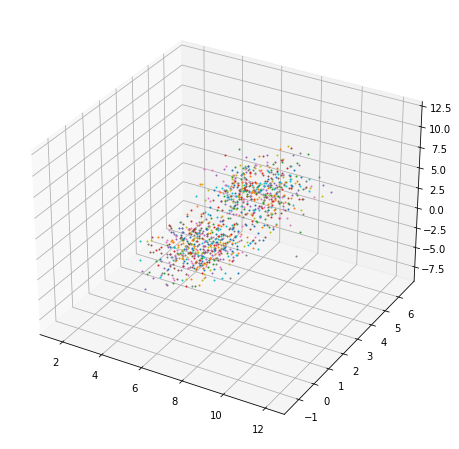

In [15]:
#!pip install seaborn
from tensorflow import keras
from sklearn.datasets import make_blobs
import pandas as pd
import seaborn as sns

x, y = make_blobs(n_features=3, n_samples=1000, centers=2, random_state=4, cluster_std=1)

fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')

for i in range(len(x)):
    ax.plot(x[i, 0], x[i, 1], x[i, 2], 'o', markersize=1)

In [16]:
## Functional model
inputs = keras.layers.Input(shape=(3,))
encodes = keras.layers.Dense(2)(inputs)
decodes = keras.layers.Dense(3)(encodes)

model = keras.Model(inputs, decodes)
model.compile(optimizer="sgd", loss="mse")

model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 8         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
Total params: 17
Trainable params: 17
Non-trainable params: 0
_________________________________________________________________


In [17]:
## train the model
model.fit(x, x, epochs=100, batch_size=100)

Epoch 1/100
10/10 [==============================] - 0s 754us/step - loss: 13.8250
Epoch 2/100
10/10 [==============================] - 0s 554us/step - loss: 0.8569
Epoch 3/100
10/10 [==============================] - 0s 620us/step - loss: 0.6598
Epoch 4/100
10/10 [==============================] - 0s 515us/step - loss: 0.5998
Epoch 5/100
10/10 [==============================] - 0s 1ms/step - loss: 0.5546
Epoch 6/100
10/10 [==============================] - 0s 546us/step - loss: 0.5242
Epoch 7/100
10/10 [==============================] - 0s 582us/step - loss: 0.4909
Epoch 8/100
10/10 [==============================] - 0s 477us/step - loss: 0.4720
Epoch 9/100
10/10 [==============================] - 0s 716us/step - loss: 0.4536
Epoch 10/100
10/10 [==============================] - 0s 570us/step - loss: 0.4419
Epoch 11/100
10/10 [==============================] - 0s 530us/step - loss: 0.4235
Epoch 12/100
10/10 [==============================] - 0s 474us/step - loss: 0.4152
Epoch 13/100
1

In [18]:
encoder = keras.Model(inputs, encodes)
encoder.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3)]               0         
_________________________________________________________________
dense (Dense)                (None, 2)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [19]:
encoded_data = encoder.predict(x)
encoded_data.shape

(1000, 2)

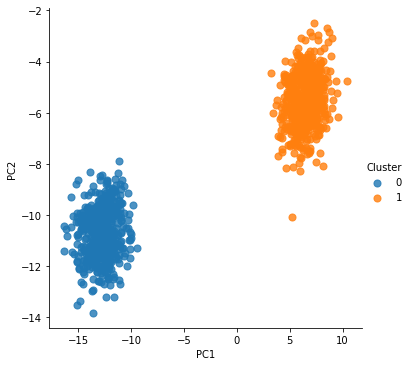

In [20]:
ae_df = pd.DataFrame(data = encoded_data , 
        columns = ['PC1', 'PC2'])
ae_df['Cluster'] = y

sns.lmplot(x="PC1", y="PC2",
  data=ae_df, 
  fit_reg=False,
  hue='Cluster',
  scatter_kws={"s": 50}) # specify the point size

In [21]:
pca = sklearnPCA(n_components=2)
encoded_pca = pca.fit_transform(x)
encoded_pca.shape

(1000, 2)

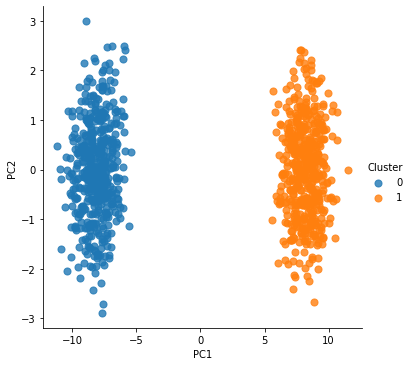

In [22]:
ae_df = pd.DataFrame(data = encoded_pca , 
        columns = ['PC1', 'PC2'])
ae_df['Cluster'] = y

sns.lmplot(x="PC1", y="PC2",
  data=ae_df, 
  fit_reg=False,
  hue='Cluster',
  scatter_kws={"s": 50}) # specify the point size

## Types of Autoencoders

### Sparse autoencoder

* Take an autoencoder with out any compression in the hidden layer (overcomplete or similar to the input layer):
    
    * This type of autoencoders has a high chance of overfitting since the neurons are free to fire at will
    
    * However if some neurons are prohibited from firing, the resulting output will not be identical to the input
    
    * Hence the reconstruction error will be large
    
    * The balance between the reconstruction error and generalization is achieved by setting a constrain at the loss that pernilizes the neural network when they fire "too much" at a given layer

#### Sparse Autoencoders
    
<img src="https://external-content.duckduckgo.com/iu/?u=https%3A%2F%2Fmiro.medium.com%2Fmax%2F1648%2F1*k9RX5_kDYt2kG0u9ZREu5w.png&f=1&nofb=1" height=500, width=600/>

* Regularizer for sparse activation

    * To constrain a hidden layer $l$, the sparsity constrain is addes to the loss function:
        
        * $J = Loss_{reconstruction} + \Omega(h^{(l)})$ where $h^{(l)}$ is the activation of the layer $l$
        
        * $\Omega(h^{(l)})$ is computed w.r.t the average activation in the layer
        
    * Potential regularizers that can be used to penalize the activation:
        
        * L1-Norm: $\Omega(h) = \dfrac {\lambda}{m}\sum_{i=1}^m|h_i|$
        
        * L2-Norm: $\Omega(h) = \dfrac {\lambda}{m}\sum_{i=1}^m(h_i)^2$
        
        * KL-Divergence

### KL-Divergence

* Take two seperate distributions, $P(x)$ and $Q(x)$ over the random variable $x$. The KL-Divergence measures the similarity between the two distributions

    * $D_{KL}(P||Q) = \mathbb E_{x \sim P} log \dfrac {P(x)}{Q(x)}$ 
    
    * This measure the extra amount of information in distribution Q(x) relative to P(x)

* Properties of KL-Divergence:
    
    * Non negative and between $0$ and $\infty$
    
    * $D_{KL} = 0$ when the both distributions are similar
    
    * $D_{KL}(P||Q) \neq D_{KL}(Q||P)$

* Bernoulli Distribution of activation

    * An activation of a neuron $j$ in layer $l$ can be modelled using a Bernoulli Distribution
    
    * The probability of a neuron being active is $p$ and inactive $1-p$
    
    * The probability mass function of a discrete random variable $X$ is given as $F(X \in \{1,0\}) = p^X(1-p)^{1-X}$

#### Probability distribution of a discrete random variable
    
<img src="https://probabilitycourse.com/images/chapter3/bernoulli(p)%20color.png" hight=300 width=300/>

* Derivation of KL-Divergence for autoencoder layer sparsity

    * Average activation of a hidden neuron $a_j$ at layer $l$ for a given input batch $x$:        

        * $\hat \rho_j = \dfrac {1}{m}\sum_{i=1}^m a_j^l(x_i)$
        
        * Take a target activation probability $\rho$
    
    * Take: target distribution $F(X) = p^X(1-p)^{1-X}$ and layer $l$ disctribution $G(X) = q^X(1-q)^{1-X}$
    
    * KL-Divergence: $D_{KL}(F||G) = \mathbb E_{x \sim F} log \dfrac {F(x)}{G(x)}$
    
    * $D_{KL}(F||G) = \mathbb E_{x \sim F} log \dfrac {p^X(1-p)^{1-X}}{q^X(1-q)^{1-X}}$
    
    * $D_{KL}(F||G) = \mathbb E_{x \sim F} [log \dfrac {p^X}{q^X} + log \dfrac{(1-p)^{1-X}}{(1-q)^{1-X}}$]
    
    * $D_{KL}(F||G) = \mathbb E_{x \sim F} (X)[log \dfrac {p}{q}] + (1- \mathbb E_{x \sim F}(X)) [log \dfrac{(1-p)}{(1-q)}$]
    
    * Because for a bernoulli distribution: \mathbb E_(X) = p
    
    * $D_{KL}(F||G) = p[log \dfrac {p}{q}] + (1- p) [log \dfrac{(1-p)}{(1-q)}$]
    
    * Now Take: $p = \rho$ and $q = \hat \rho_j$
    
    * The sparsity panelty for the hidden layer $l$: 
        
        * $D_{KL}(\rho||\hat \rho_j) =  \rho log \dfrac {\rho}{\hat \rho_j} + (1- \rho) log \dfrac{(1-\rho)}{(1-\hat \rho_j)}$
        
* The final cost function for a sparse autoencoder:
    
    * $J_{AE} = Loss_{reconstruction} + \beta \sum_{j=1}^{s_2} D_{KL}(\rho||\hat \rho_j)$ ; where $s_2$ is the number of neurons in the layer $l$ and $\beta$ a hyper parameter

#### Ref-Sparse-AE: KL divergence: When the probability distributions are similar KLD=0 otherwise it will gradually go towards infinity
<img src="./images/kld.png" height=300 width=400 />

### Denoising Autoencoders (DAE)

* The denoising autoencoders achieve the generalization by learning to clean artificially corrupted data (typically by noise)

* The prediction of a DAE is: $\hat X = D(h = E(\tilde X))$

    * $D$ and $E$ are Decoder and Encoder functions

    * $h$ is the hidden representation
    
    * $\tilde X = X + noise$
    
    * $\hat X$ is the prediction that should be similar to $X$

## Autoencoder References

* Ref-Sparse-AE: http://web.stanford.edu/class/cs294a/sparseAutoencoder.pdf
* Bernoulli Distribution: https://www.probabilitycourse.com/chapter3/3_1_5_special_discrete_distr.php
* KLD: 
    * http://web.stanford.edu/class/stats311/Lectures/2014-full_notes.pdf
    * Technical Notes on Kullback-Leibler Divergence Alexander Etz
* L-1, L-2 norms: https://montjoile.medium.com/l0-norm-l1-norm-l2-norm-l-infinity-norm-7a7d18a4f40c
* k-sparse Autoencoders: https://arxiv.org/pdf/1312.5663.pdf
* Sparse AE pytorch: 
    * https://debuggercafe.com/sparse-autoencoders-using-kl-divergence-with-pytorch/
    * https://debuggercafe.com/sparse-autoencoders-using-l1-regularization-with-pytorch/

# MNIST Reconstruction with Simple, Sparse and Denoising AE

## MNIST LOADER

In [23]:
from tensorflow.keras.datasets import mnist
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


## Simple Autoencoder

In [24]:
## Functional model
inputs = keras.layers.Input(shape=(784,))
encodes = keras.layers.Dense(32, activation='relu')(inputs)
decodes = keras.layers.Dense(784, activation='sigmoid')(encodes)

simple_ae = keras.Model(inputs, decodes)

simple_ae.summary()

Model: "functional_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 784)               25872     
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [25]:
simple_ae.compile(optimizer='adam', loss='binary_crossentropy')

In [26]:
simple_ae.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 0s 2ms/step - loss: 0.2750 - val_loss: 0.1899
Epoch 2/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1717 - val_loss: 0.1543
Epoch 3/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1454 - val_loss: 0.1351
Epoch 4/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1297 - val_loss: 0.1225
Epoch 5/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1193 - val_loss: 0.1139
Epoch 6/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1121 - val_loss: 0.1080
Epoch 7/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1071 - val_loss: 0.1037
Epoch 8/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1034 - val_loss: 0.1005
Epoch 9/50
235/235 [==============================] - 0s 1ms/step - loss: 0.1004 - val_loss: 0.0980
Epoch 10/50
235/235 [==============================] - 0s 1ms/step - loss: 0.0982 - val_loss: 0.0961

In [27]:
decoded_imgs = simple_ae.predict(x_test)

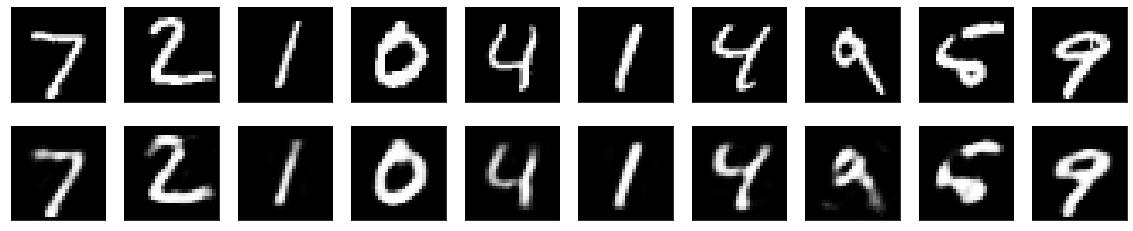

In [28]:
## Reference: https://blog.keras.io/building-autoencoders-in-keras.html

# Use Matplotlib (don't ask)
import matplotlib.pyplot as plt

def plot_imgs(x_test, decoded_imgs):
    n = 10  # How many digits we will display
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Display original
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(x_test[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Display reconstruction
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(decoded_imgs[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()
    
plot_imgs(x_test, decoded_imgs)

## L1-Sparse Autoencoder

In [29]:
from tensorflow.keras import regularizers

## Functional model
inputs = keras.layers.Input(shape=(784,))
encodes = keras.layers.Dense(784, activation='relu',
                activity_regularizer=regularizers.l1(10e-5))(inputs) ##sparsity with l1 regularizer
decodes = keras.layers.Dense(784, activation='sigmoid')(encodes)

l1_sparse_ae = keras.Model(inputs, decodes)

l1_sparse_ae.summary()

Model: "functional_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_4 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_5 (Dense)              (None, 784)               615440    
Total params: 1,230,880
Trainable params: 1,230,880
Non-trainable params: 0
_________________________________________________________________


In [30]:
l1_sparse_ae.compile(optimizer='adam', loss='binary_crossentropy')

In [31]:
l1_sparse_ae.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 1s 2ms/step - loss: 0.1756 - val_loss: 0.1113
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1018 - val_loss: 0.0942
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0915 - val_loss: 0.0883
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0871 - val_loss: 0.0852
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0844 - val_loss: 0.0832
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0826 - val_loss: 0.0816
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0811 - val_loss: 0.0805
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0800 - val_loss: 0.0795
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0791 - val_loss: 0.0787
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0783 - val_loss: 0.0781

In [32]:
decoded_imgs = l1_sparse_ae.predict(x_test)

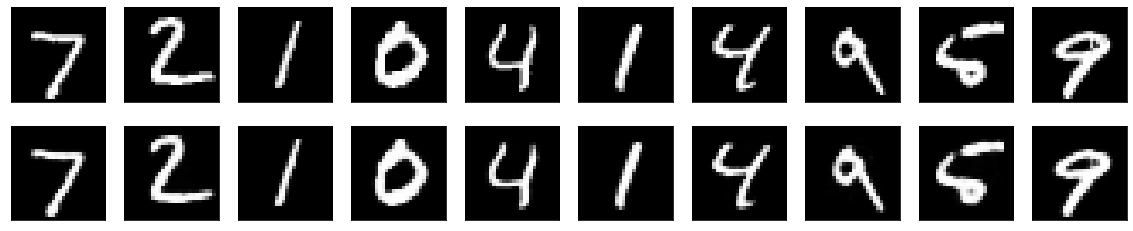

In [33]:
plot_imgs(x_test, decoded_imgs)

## KLD Sparse Autoencoder

In [34]:
## Reference: https://github.com/jadhavhninad/Sparse_autoencoder.git
import tensorflow as tf

#Custom Regularizer function 
def sparse_reg(activ_matrix):
    p = 0.01
    beta = 3
    p_hat = keras.backend.mean(activ_matrix) # average over the batch samples
    #print("p_hat = ",p_hat)
    #KLD = p*(K.log(p)-K.log(p_hat)) + (1-p)*(K.log(1-p)-K.log(1-p_hat))
    KLD = p*(keras.backend.log(p/p_hat)) + (1-p)*(keras.backend.log(1-p/1-p_hat))
    #print("KLD = ", KLD)
    return beta * keras.backend.sum(KLD) # sum over the layer units

In [35]:
## Functional model
inputs = keras.layers.Input(shape=(784,))
encodes = keras.layers.Dense(784, activation='sigmoid', activity_regularizer=sparse_reg)(inputs) ##sparsity with l1 regularizer
decodes = keras.layers.Dense(784, activation='sigmoid')(encodes)

kld_sparse_ae = keras.Model(inputs, decodes)

kld_sparse_ae.summary()

Model: "functional_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_7 (Dense)              (None, 784)               615440    
Total params: 1,230,880
Trainable params: 1,230,880
Non-trainable params: 0
_________________________________________________________________


In [36]:
kld_sparse_ae.compile(optimizer='adam', loss='binary_crossentropy')

In [37]:
kld_sparse_ae.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1803 - val_loss: 0.1195
Epoch 2/50
235/235 [==============================] - 0s 2ms/step - loss: 0.1017 - val_loss: 0.0864
Epoch 3/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0803 - val_loss: 0.0731
Epoch 4/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0705 - val_loss: 0.0661
Epoch 5/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0648 - val_loss: 0.0617
Epoch 6/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0611 - val_loss: 0.0587
Epoch 7/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0584 - val_loss: 0.0564
Epoch 8/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0563 - val_loss: 0.0546
Epoch 9/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0546 - val_loss: 0.0530
Epoch 10/50
235/235 [==============================] - 0s 2ms/step - loss: 0.0531 - val_loss: 0.0518

In [38]:
decoded_imgs = kld_sparse_ae.predict(x_test)

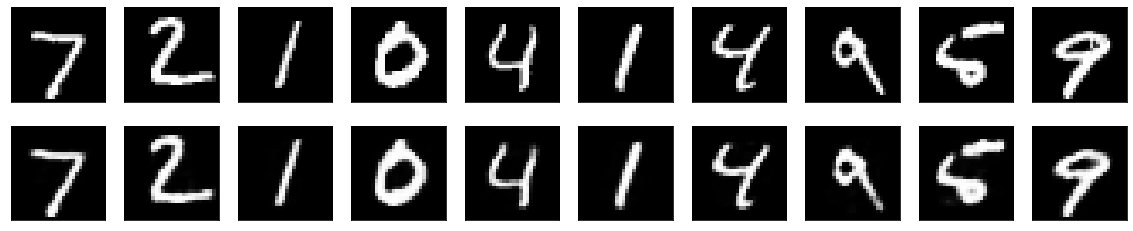

In [39]:
plot_imgs(x_test, decoded_imgs)

## Denoising Autoencoders

In [40]:
## Reference: https://github.com/PacktPublishing/Advanced-Deep-Learning-with-Keras/blob/master/chapter3-autoencoders/denoising-autoencoder-mnist-3.3.1.py

noise = np.random.normal(loc=0.5, scale=0.5, size=x_train.shape)
x_train_noisy = x_train + noise
noise = np.random.normal(loc=0.5, scale=0.5, size=x_test.shape)
x_test_noisy = x_test + noise

# adding noise may exceed normalized pixel values>1.0 or <0.0
# clip pixel values >1.0 to 1.0 and <0.0 to 0.0
x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

In [41]:
## Functional model
inputs = keras.layers.Input(shape=(784,))
encodes = keras.layers.Dense(784, activation='relu')(inputs) ##sparsity with l1 regularizer
decodes = keras.layers.Dense(784, activation='sigmoid')(encodes)

denoise_ae = keras.Model(inputs, decodes)

denoise_ae.summary()

Model: "functional_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_8 (Dense)              (None, 784)               615440    
_________________________________________________________________
dense_9 (Dense)              (None, 784)               615440    
Total params: 1,230,880
Trainable params: 1,230,880
Non-trainable params: 0
_________________________________________________________________


In [42]:
denoise_ae.compile(optimizer='adam', loss='binary_crossentropy')

In [43]:
denoise_ae.fit(x_train_noisy, x_train,
                epochs=70,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/70
235/235 [==============================] - 0s 2ms/step - loss: 0.2173 - val_loss: 0.1642
Epoch 2/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1510 - val_loss: 0.1400
Epoch 3/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1360 - val_loss: 0.1316
Epoch 4/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1295 - val_loss: 0.1272
Epoch 5/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1256 - val_loss: 0.1248
Epoch 6/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1232 - val_loss: 0.1233
Epoch 7/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1213 - val_loss: 0.1214
Epoch 8/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1199 - val_loss: 0.1201
Epoch 9/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1187 - val_loss: 0.1197
Epoch 10/70
235/235 [==============================] - 0s 2ms/step - loss: 0.1179 - val_loss: 0.1191

In [44]:
decoded_imgs = denoise_ae.predict(x_test_noisy)

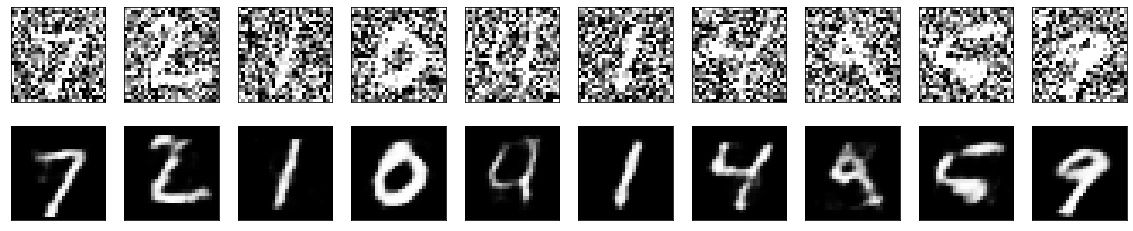

In [45]:
plot_imgs(x_test_noisy, decoded_imgs)

In [46]:
## 

In [47]:
## Functional model
inputs = keras.layers.Input(shape=(784,))
x = keras.layers.Dense(128, activation='relu')(inputs) 
x = keras.layers.Dense(64, activation='relu')(x)
encodes = keras.layers.Dense(32, activation='relu')(x)
x = keras.layers.Dense(64, activation='relu')(encodes)
x = keras.layers.Dense(128, activation='relu')(x)
decodes = keras.layers.Dense(784, activation='sigmoid')(x)

deep_ae = keras.Model(inputs, decodes)

deep_ae.summary()

Model: "functional_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_6 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_10 (Dense)             (None, 128)               100480    
_________________________________________________________________
dense_11 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_12 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_13 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_15 (Dense)             (None, 784)             

In [48]:
deep_ae.compile(optimizer='adam', loss='binary_crossentropy')

In [49]:
deep_ae.fit(x_train, x_train,
                epochs=100,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/100
235/235 [==============================] - 0s 2ms/step - loss: 0.2444 - val_loss: 0.1697
Epoch 2/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1526 - val_loss: 0.1376
Epoch 3/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1334 - val_loss: 0.1272
Epoch 4/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1247 - val_loss: 0.1193
Epoch 5/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1184 - val_loss: 0.1144
Epoch 6/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1141 - val_loss: 0.1109
Epoch 7/100
235/235 [==============================] - 0s 1ms/step - loss: 0.1107 - val_loss: 0.1086
Epoch 8/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1077 - val_loss: 0.1048
Epoch 9/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1051 - val_loss: 0.1036
Epoch 10/100
235/235 [==============================] - 0s 2ms/step - loss: 0.1030 - val_lo

In [50]:
decoded_imgs = deep_ae.predict(x_test)

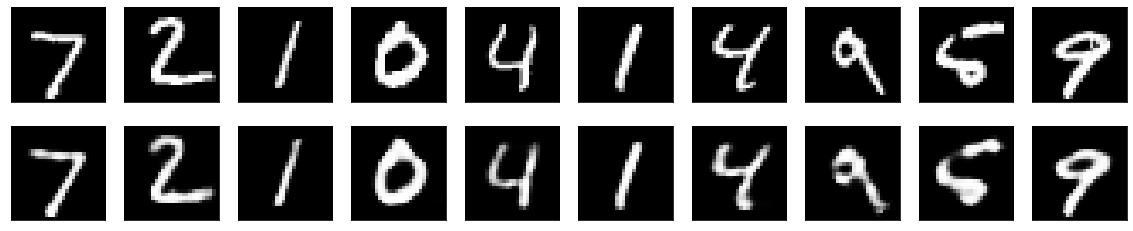

In [51]:
plot_imgs(x_test, decoded_imgs)

In [52]:
## Reference: https://blog.keras.io/building-autoencoders-in-keras.html
input_img = keras.Input(shape=(28, 28, 1))

x = keras.layers.Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = keras.layers.MaxPooling2D((2, 2), padding='same')(x)

# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
x = keras.layers.Conv2D(16, (3, 3), activation='relu')(x)
x = keras.layers.UpSampling2D((2, 2))(x)
decoded = keras.layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

cnn_ae = keras.Model(input_img, decoded)
cnn_ae.compile(optimizer='adam', loss='binary_crossentropy')

cnn_ae.summary()

Model: "functional_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_7 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 8)         

In [53]:
## Upsampling layer demonstration
## Reference: https://keras.io/api/layers/reshaping_layers/up_sampling2d/
input_shape = (2, 2, 1, 3)
x = np.arange(np.prod(input_shape)).reshape(input_shape)
print(x.shape)
y = tf.keras.layers.UpSampling2D(size=(2, 2))(x)
print(y.shape)

(2, 2, 1, 3)
(2, 4, 2, 3)


In [54]:
## make flat vector a 4d tensor
x_train_2d = np.array(list(map(lambda x: x.reshape(28, 28, 1), x_train)))
x_test_2d = np.array(list(map(lambda x: x.reshape(28, 28, 1), x_test)))
x_train_2d.shape

(60000, 28, 28, 1)

In [55]:
cnn_ae.fit(x_train_2d, x_train_2d,
                epochs=100,#50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test_2d, x_test_2d))

Epoch 1/100
235/235 [==============================] - 2s 7ms/step - loss: 0.2936 - val_loss: 0.1761
Epoch 2/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1599 - val_loss: 0.1479
Epoch 3/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1397 - val_loss: 0.1311
Epoch 4/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1268 - val_loss: 0.1213
Epoch 5/100
235/235 [==============================] - 2s 6ms/step - loss: 0.1197 - val_loss: 0.1164
Epoch 6/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1157 - val_loss: 0.1133
Epoch 7/100
235/235 [==============================] - 1s 6ms/step - loss: 0.1130 - val_loss: 0.1108
Epoch 8/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1109 - val_loss: 0.1089
Epoch 9/100
235/235 [==============================] - 1s 5ms/step - loss: 0.1092 - val_loss: 0.1075
Epoch 10/100
235/235 [==============================] - 2s 7ms/step - loss: 0.1078 - val_lo

In [56]:
decoded_imgs = cnn_ae.predict(x_test_2d)
decoded_imgs = np.array(list(map(lambda x: x.reshape(784), decoded_imgs)))

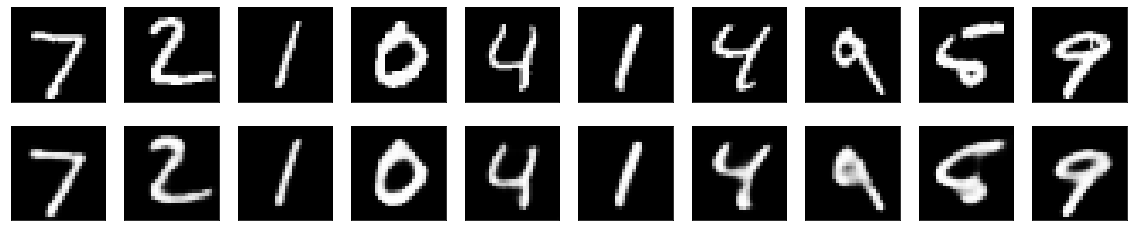

In [57]:
plot_imgs(x_test_2d, decoded_imgs)

## KLD Sparse AE Tensorboard visualization

In [58]:
%rm -r tmp

In [59]:
%mkdir -p tmp/autoencoder

### Run in the terminal: tensorboard --logdir=tmp/autoencoder

In [60]:
from tensorflow.keras.callbacks import TensorBoard

kld_sparse_ae.fit(x_train, x_train,
                epochs=10,#50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),
                callbacks=[TensorBoard(log_dir='tmp/autoencoder')])

Epoch 1/10
  1/235 [..............................] - ETA: 0s - loss: 0.0350WARNING:tensorflow:From /home/akaaku13m/.pyenv/versions/tf_env/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
235/235 [==============================] - 0s 2ms/step - loss: 0.0347 - val_loss: 0.0345
Epoch 2/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.0342
Epoch 3/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0343 - val_loss: 0.0340
Epoch 4/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0341 - val_loss: 0.0338
Epoch 5/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0340 - val_loss: 0.0338
Epoch 6/10
235/235 [==============================] - 0s 2ms/step - loss: 0.0338 - val_loss: 0.0335
Epoch 7/10
235/235 [=========

# Anomaly Detection with Autoencoders

## Introduction

* Anomaly can occur in any type of data:

    * Out of distribution data in the case of classification and detection tasks
    
    * Malicious activities in unsupervised activity classification task
    
* The anomalous data are heavily class imbalanced

    * The number of anomalous events are much less than nomal events in a system
    
    * So a direct classification would be heavily class imbalanced
    
* Autoencoders can be used for detecting anamolies using the reconstruction error:

    * Measure the reconstruction error for dataset the autoencoder trained with
    
    * Set a error threshold to determine what are the anamolies
    
    * Test the autoencoder against the suspected dataset

## KLD Sparse AE anomaly detection (Against Fashion MNIST and Noisy MNIST)

In [61]:
from tensorflow.keras.datasets import fashion_mnist
(x_train_a, _), (x_test_a, _) = fashion_mnist.load_data()
x_train_a = x_train_a.astype('float32') / 255.
x_test_a = x_test_a.astype('float32') / 255.
x_train_a = x_train_a.reshape((len(x_train_a), np.prod(x_train_a.shape[1:])))
x_test_a = x_test_a.reshape((len(x_test_a), np.prod(x_test_a.shape[1:])))
print(x_train_a.shape)
print(x_test_a.shape)

(60000, 784)
(10000, 784)


In [62]:
## use kld sparse ae to predict the fashion mnist data
decoded_imgs_a = kld_sparse_ae.predict(x_test_a)
decoded_imgs = kld_sparse_ae.predict(x_test)

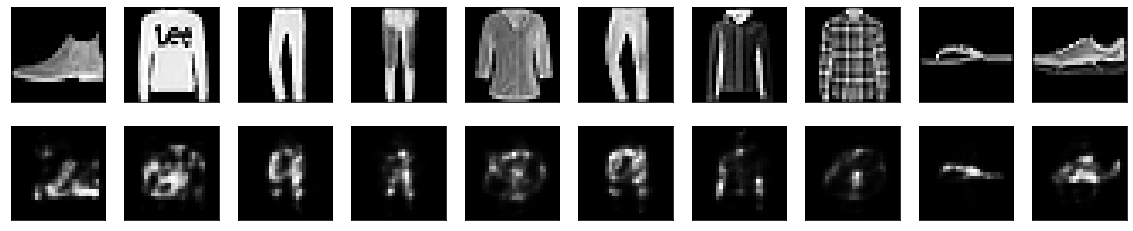

In [63]:
plot_imgs(x_test_a, decoded_imgs_a)

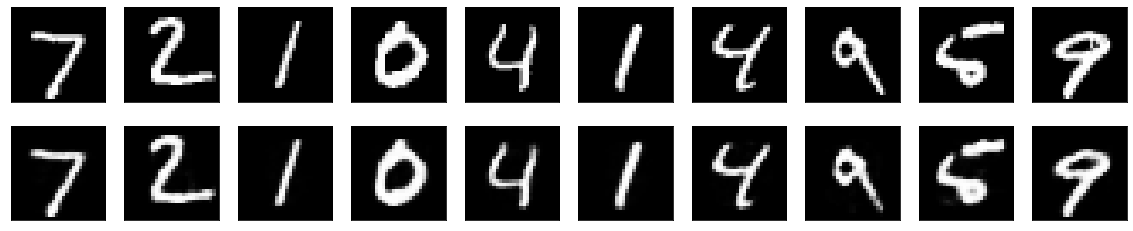

In [64]:
plot_imgs(x_test, decoded_imgs)

In [65]:
reconstruction_error = lambda y_hat,y: np.square(np.subtract(y, y_hat)).mean()

In [66]:
anomaly_error = np.array(list(map(reconstruction_error, decoded_imgs_a,x_test_a)))
normal_error = np.array(list(map(reconstruction_error, decoded_imgs, x_test)))

Text(0.5, 0.98, 'Anomaly vs Normal reconstrution error')

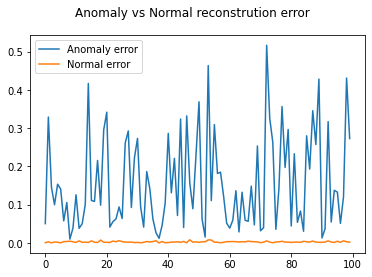

In [67]:
plot_len = 100
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(np.arange(0, plot_len), anomaly_error[:plot_len], label="Anomaly error")
ax.plot(np.arange(0, plot_len), normal_error[:plot_len], label="Normal error")
ax.legend()
fig.suptitle('Anomaly vs Normal reconstrution error')

In [68]:
print("Mean reconstruct error: Anomaly: {}, Normal: {}".format(anomaly_error.mean(), normal_error.mean()))

Mean reconstruct error: Anomaly: 0.14621970057487488, Normal: 0.0031843676697462797


In [69]:
## What happens when the ae is tested against the noisy dataset
decoded_imgs_noisy = kld_sparse_ae.predict(x_test_noisy)

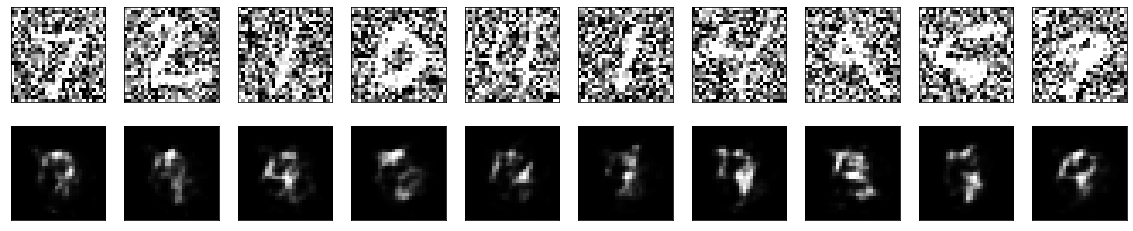

In [70]:
plot_imgs(x_test_noisy, decoded_imgs_noisy)

In [71]:
noisy_error = np.array(list(map(reconstruction_error, decoded_imgs_noisy,x_test_noisy)))

Text(0.5, 0.98, 'Noisy vs Normal reconstrution error')

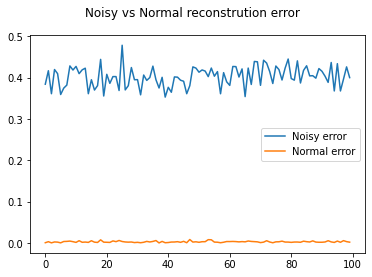

In [72]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(np.arange(0, plot_len), noisy_error[:plot_len], label="Noisy error")
ax.plot(np.arange(0, plot_len), normal_error[:plot_len], label="Normal error")
ax.legend()
fig.suptitle('Noisy vs Normal reconstrution error')

In [73]:
print("Mean reconstruct error: Anomaly: {}, Normal: {}".format(noisy_error.mean(), normal_error.mean()))

Mean reconstruct error: Anomaly: 0.4070011294496663, Normal: 0.0031843676697462797


## Denoising AE anomaly detection (Against Fashion MNIST and MNIST)

In [74]:
decoded_imgs_a = deep_ae.predict(x_test_a)
decoded_imgs_noisy = deep_ae.predict(x_test_noisy)
decoded_imgs = deep_ae.predict(x_test)

In [75]:
anomaly_error_1 = np.array(list(map(reconstruction_error, decoded_imgs_a,x_test_a)))
normal = np.array(list(map(reconstruction_error, decoded_imgs_noisy, x_test_noisy)))
anomaly_error_2 = np.array(list(map(reconstruction_error, decoded_imgs, x_test)))

Text(0.5, 0.98, 'Anomaly vs Normal reconstrution error')

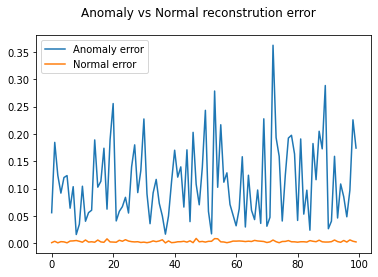

In [76]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(np.arange(0, plot_len), anomaly_error_1[:plot_len], label="Anomaly error")
ax.plot(np.arange(0, plot_len), normal_error[:plot_len], label="Normal error")
ax.legend()
fig.suptitle('Anomaly vs Normal reconstrution error')

Text(0.5, 0.98, 'Anomaly vs Normal reconstrution error')

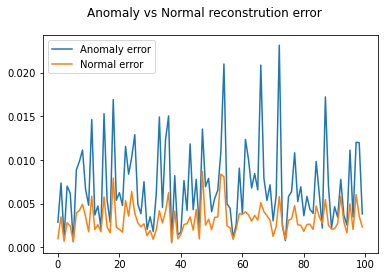

In [77]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(np.arange(0, plot_len), anomaly_error_2[:plot_len], label="Anomaly error")
ax.plot(np.arange(0, plot_len), normal_error[:plot_len], label="Normal error")
ax.legend()
fig.suptitle('Anomaly vs Normal reconstrution error')

In [78]:
print("Mean reconstruct error: Anomaly 1: {}, Anomaly 2: {}, Normal: {}".format(anomaly_error_1.mean(), anomaly_error_2.mean(), normal_error.mean()))

Mean reconstruct error: Anomaly 1: 0.10857563465833664, Anomaly 2: 0.0068642026744782925, Normal: 0.0031843676697462797


### Variational Autoencoders (VAE)

* Genarative models are capable of synthesizing novel data samples, where the sample belongs to a specific cluster learnt by the model

* The decoder part of any autoencoder can be considered as a generator

* E.g. A vector sampled from the latent space can be used to generate the data

* A typical autoencoder learns to encode the inputs into a latent space variables

* These variables represents a structure learnt from the data

* However the clusters of the latent representations are sparsely distributed

* A regularization in the latent space can be used to constrain the clusters into a dense distribution (around a known mean and standerd deviation)

* A latent space sample can now generate useful data using the decoder

#### Latent space distribution Normal vs Regluarized cases

<img src="https://miro.medium.com/max/4800/1*9ouOKh2w-b3NNOVx4Mw9bg@2x.png"  />

* VAE addresses the latent space sparsity issue through regularization

* In VAE:
    
    * Encoder outputs the means and log variances of a multivariate distribution given the data
    
    * From this distribution, a latent vector is sampled for the decoder
    
    * Decoder generates an output according to the sampled latent vector

#### Variational Autoencoder Architecture

<img src="https://www.jeremyjordan.me/content/images/2018/03/Screen-Shot-2018-03-18-at-12.24.19-AM.png" />

* A typical regularizer for the latent space is KL-Divergence

* In this case the loss is penalized when the latent space distribution diverge from a unit gaussian

* When sampling a laten vector using the mean and variance, it is difficult to backpropagate through a random sampler

    * To address this the reparameterization trick is developed
    
    * $z_{latent} \sim \mathcal{N}(\mu,\,\sigma)$ ; Not suitable for backpropagation
    
    * $\mu + \sigma \circ \epsilon$ ; $\epsilon$ is a unit gaussian and only $\mu$ and $\sigma$ are trainable

In [79]:
## From the documentation of keras VAE: https://keras.io/examples/generative/vae/

## Import the libraries
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [80]:
## Keras Custom Layer ##
class Sampling(layers.Layer):
    """Uses (z_mean, z_log_var) to sample z, the vector encoding a digit."""

    def call(self, inputs):
        ## take the mean and log variance output from the encoder
        z_mean, z_log_var = inputs
        ## take the dimensions
        batch = tf.shape(z_mean)[0]
        dim = tf.shape(z_mean)[1]
        ## Reparameterization trick ##
        ## sample a vector from a unit gaussian
        epsilon = tf.keras.backend.random_normal(shape=(batch, dim))
        ## reparameterize the the unit gaussian to be a latent vector
        return z_mean + tf.exp(0.5 * z_log_var) * epsilon

In [81]:
## Build the encoder ##
## latent space belongs to a bivariate normal distribution
latent_dim = 2

## Input layer
encoder_inputs = keras.Input(shape=(28, 28, 1))
## Encode the inputs
x = layers.Conv2D(32, 3, activation="relu", strides=2, padding="same")(encoder_inputs)
x = layers.Conv2D(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Flatten()(x)
x = layers.Dense(16, activation="relu")(x)
## Map the encodings to a bivariate mean and a log variance
z_mean = layers.Dense(latent_dim, name="z_mean")(x)
z_log_var = layers.Dense(latent_dim, name="z_log_var")(x)
## Sample a latent vector given the mean and log variance (N(mu, stdv))
z = Sampling()([z_mean, z_log_var])
## Build the encoder that outputs the mean, log var and the latent vector (sampled)
encoder = keras.Model(encoder_inputs, [z_mean, z_log_var, z], name="encoder")
encoder.summary()

Model: "encoder"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            [(None, 28, 28, 1)]  0                                            
__________________________________________________________________________________________________
conv2d_7 (Conv2D)               (None, 14, 14, 32)   320         input_8[0][0]                    
__________________________________________________________________________________________________
conv2d_8 (Conv2D)               (None, 7, 7, 64)     18496       conv2d_7[0][0]                   
__________________________________________________________________________________________________
flatten (Flatten)               (None, 3136)         0           conv2d_8[0][0]                   
____________________________________________________________________________________________

In [82]:
## Build the decoder ##

## take a latent vector as an input
latent_inputs = keras.Input(shape=(latent_dim,))
## Decode the latent vector, first increase the dims to so we can upsample
x = layers.Dense(7 * 7 * 64, activation="relu")(latent_inputs)
## Reshape the decode to a tensor
x = layers.Reshape((7, 7, 64))(x)
## Upsample and decode
x = layers.Conv2DTranspose(64, 3, activation="relu", strides=2, padding="same")(x)
x = layers.Conv2DTranspose(32, 3, activation="relu", strides=2, padding="same")(x)
## Produce the final reconstruction (1 channel hw)
decoder_outputs = layers.Conv2DTranspose(1, 3, activation="sigmoid", padding="same")(x)
## Build the decoder model
decoder = keras.Model(latent_inputs, decoder_outputs, name="decoder")
decoder.summary()

Model: "decoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_17 (Dense)             (None, 3136)              9408      
_________________________________________________________________
reshape (Reshape)            (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 14, 14, 64)        36928     
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 32)        18464     
_________________________________________________________________
conv2d_transpose_2 (Conv2DTr (None, 28, 28, 1)         289       
Total params: 65,089
Trainable params: 65,089
Non-trainable params: 0
_______________________________________________________

In [83]:
## VAE model class ##

class VAE(keras.Model):
    def __init__(self, encoder, decoder, **kwargs):
        super(VAE, self).__init__(**kwargs)
        ## Initialize the encoder and decoder
        self.encoder = encoder
        self.decoder = decoder
        ## Initialize the performance metrics
        self.total_loss_tracker = keras.metrics.Mean(name="total_loss")
        self.reconstruction_loss_tracker = keras.metrics.Mean(
            name="reconstruction_loss"
        )
        self.kl_loss_tracker = keras.metrics.Mean(name="kl_loss")

    @property
    def metrics(self):
        return [
            self.total_loss_tracker,
            self.reconstruction_loss_tracker,
            self.kl_loss_tracker,
        ]

    ## Train the model with custom gradiants ##
    def train_step(self, data):
        with tf.GradientTape() as tape:
            ## Sample the latent vector from the encoder
            z_mean, z_log_var, z = self.encoder(data)
            ## Reconstrut the input given the latent sample
            reconstruction = self.decoder(z)
            ## Compute the reconstruction loss compared to the input
            reconstruction_loss = tf.reduce_mean(
                ## sum the bce over hight and width
                tf.reduce_sum(
                    keras.losses.binary_crossentropy(data, reconstruction), axis=(1, 2)
                )
            )
            ## Compute the divergence of the distribution from a unit gaussian
            kl_loss = -0.5 * (1 + z_log_var - tf.square(z_mean) - tf.exp(z_log_var))
            kl_loss = tf.reduce_mean(tf.reduce_sum(kl_loss, axis=1))
            ## Compute the total loss
            total_loss = reconstruction_loss + kl_loss
        ## Compute the gradients w.r.t the total loss
        grads = tape.gradient(total_loss, self.trainable_weights)
        ## Do an optimization step (w = w - lr dE/dw)
        self.optimizer.apply_gradients(zip(grads, self.trainable_weights))
        ## Update the performance trackers
        self.total_loss_tracker.update_state(total_loss)
        self.reconstruction_loss_tracker.update_state(reconstruction_loss)
        self.kl_loss_tracker.update_state(kl_loss)
        ## Return the statistics
        return {
            "loss": self.total_loss_tracker.result(),
            "reconstruction_loss": self.reconstruction_loss_tracker.result(),
            "kl_loss": self.kl_loss_tracker.result(),
        }

In [84]:
(x_train, _), (x_test, _) = keras.datasets.mnist.load_data()
mnist_digits = np.concatenate([x_train, x_test], axis=0)
mnist_digits = np.expand_dims(mnist_digits, -1).astype("float32") / 255

vae = VAE(encoder, decoder)
vae.compile(optimizer=keras.optimizers.Adam())
vae.fit(mnist_digits, epochs=30, batch_size=128)

Epoch 1/30
547/547 [==============================] - 5s 9ms/step - loss: 247.3967 - reconstruction_loss: 204.4221 - kl_loss: 3.6561
Epoch 2/30
547/547 [==============================] - 5s 8ms/step - loss: 187.6001 - reconstruction_loss: 179.2607 - kl_loss: 3.9893
Epoch 3/30
547/547 [==============================] - 5s 9ms/step - loss: 169.0690 - reconstruction_loss: 161.2719 - kl_loss: 5.8390
Epoch 4/30
547/547 [==============================] - 5s 9ms/step - loss: 163.1074 - reconstruction_loss: 155.7392 - kl_loss: 6.1552
Epoch 5/30
547/547 [==============================] - 5s 9ms/step - loss: 159.7333 - reconstruction_loss: 153.1115 - kl_loss: 6.2975
Epoch 6/30
547/547 [==============================] - 5s 9ms/step - loss: 158.0516 - reconstruction_loss: 151.3606 - kl_loss: 6.3738
Epoch 7/30
547/547 [==============================] - 5s 10ms/step - loss: 156.6195 - reconstruction_loss: 150.0079 - kl_loss: 6.4401
Epoch 8/30
547/547 [==============================] - 5s 9ms/step - 

[-1.         -0.93103448 -0.86206897 -0.79310345 -0.72413793 -0.65517241
 -0.5862069  -0.51724138 -0.44827586 -0.37931034 -0.31034483 -0.24137931
 -0.17241379 -0.10344828 -0.03448276  0.03448276  0.10344828  0.17241379
  0.24137931  0.31034483  0.37931034  0.44827586  0.51724138  0.5862069
  0.65517241  0.72413793  0.79310345  0.86206897  0.93103448  1.        ]
[ 1.          0.93103448  0.86206897  0.79310345  0.72413793  0.65517241
  0.5862069   0.51724138  0.44827586  0.37931034  0.31034483  0.24137931
  0.17241379  0.10344828  0.03448276 -0.03448276 -0.10344828 -0.17241379
 -0.24137931 -0.31034483 -0.37931034 -0.44827586 -0.51724138 -0.5862069
 -0.65517241 -0.72413793 -0.79310345 -0.86206897 -0.93103448 -1.        ]


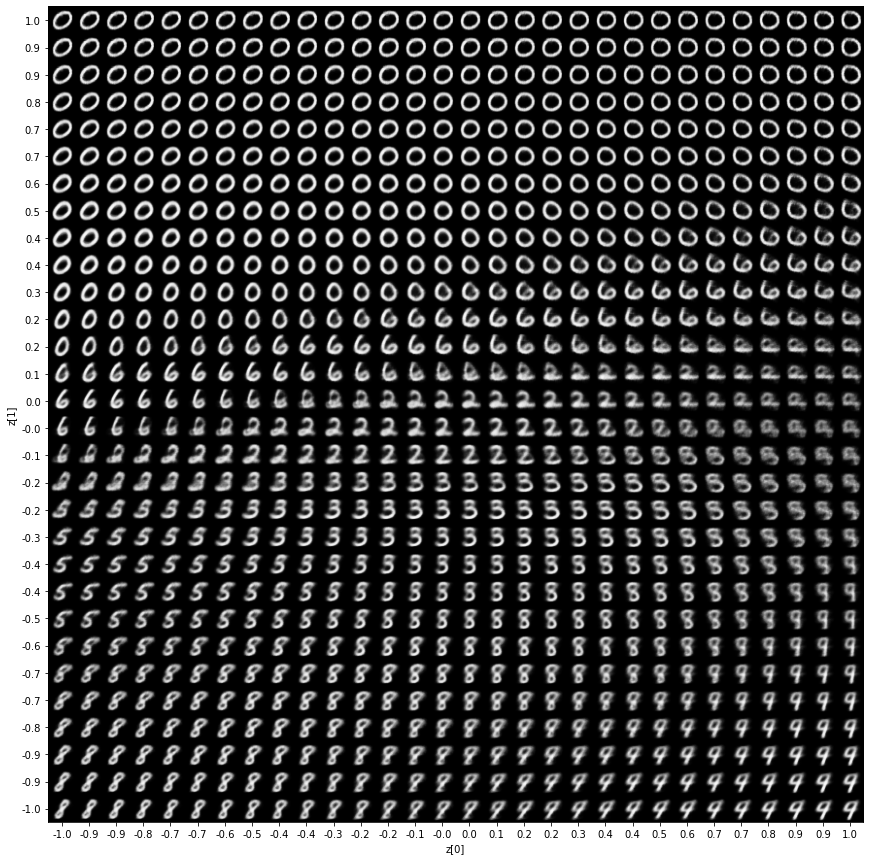

In [85]:
import matplotlib.pyplot as plt


def plot_latent_space(vae, n=30, figsize=15):
    # display a n*n 2D manifold of digits
    digit_size = 28
    scale = 1.0
    figure = np.zeros((digit_size * n, digit_size * n))
    # linearly spaced coordinates corresponding to the 2D plot
    # of digit classes in the latent space
    grid_x = np.linspace(-scale, scale, n)
    print(grid_x)
    grid_y = np.linspace(-scale, scale, n)[::-1]
    print(grid_y)

    for i, yi in enumerate(grid_y):
        for j, xi in enumerate(grid_x):
            z_sample = np.array([[xi, yi]])
            x_decoded = vae.decoder.predict(z_sample)
            digit = x_decoded[0].reshape(digit_size, digit_size)
            figure[
                i * digit_size : (i + 1) * digit_size,
                j * digit_size : (j + 1) * digit_size,
            ] = digit

    plt.figure(figsize=(figsize, figsize))
    start_range = digit_size // 2
    end_range = n * digit_size + start_range
    pixel_range = np.arange(start_range, end_range, digit_size)
    sample_range_x = np.round(grid_x, 1)
    sample_range_y = np.round(grid_y, 1)
    plt.xticks(pixel_range, sample_range_x)
    plt.yticks(pixel_range, sample_range_y)
    plt.xlabel("z[0]")
    plt.ylabel("z[1]")
    plt.imshow(figure, cmap="Greys_r")
    plt.show()


plot_latent_space(vae)